___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from customer of a food delivery company.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will specify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

***Features:***
- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- ***Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise*** 
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- The First Look

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering with numeric features

    * Create a new dataset with numeric features
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Clustering based on selected features

    * Create a new dataset with variables of your choice*
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering with selected features

    * Determine optimal number of clusters using Dendogram*

    * Apply Agglomerative Clustering*

    * Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

### Import Libraries

In [137]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.metrics import silhouette_score

from ipywidgets import interact
import warnings

warnings.filterwarnings("ignore")

pd.options.display.float_format = (
    lambda x: "{:.0f}".format(x) if int(x) == x else "{:,.2f}".format(x)
)

### Load Dataset

In [138]:
data = pd.read_csv('marketing_campaign.csv', sep=';')

In [139]:
df = data.copy()
df.sample(10).T

,1168,2020,197,1984,367,2202,1956,1016,877,1330
ID,10486,9829,9938,1406,4432,11133,8514,7010,10602,4832
Year_Birth,1948,1978,1954,1975,1976,1973,1976,1965,1983,1979
Education,Graduation,Graduation,Graduation,Graduation,Graduation,PhD,Graduation,2n Cycle,Graduation,Graduation
Marital_Status,Married,Together,Married,Single,Divorced,YOLO,Together,Married,Married,Married
Income,77142,28587,80067,53201,31615,48432,29478,70924,39922,27244
Kidhome,0,1,0,1,1,0,1,0,1,1
Teenhome,0,0,0,1,0,1,0,0,0,0
Dt_Customer,2013-05-29,2014-02-12,2013-09-19,2013-02-12,2013-03-16,2012-10-18,2014-01-17,2014-04-07,2013-02-14,2014-03-07
Recency,54,42,82,49,82,3,59,41,30,84
MntWines,476,22,519,280,2,322,8,635,29,6


### The First Look
- Since we will do clustering analysis, we will remove Response variable from dataset.
- You can rename columns to more usable, if you need.

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [141]:
from skimpy import skim

skim(df)

from skimpy import clean_columns

df = clean_columns(df)
df.head(3)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2240   │ │ int32       │ 25    │                                                          │
│ │ Number of columns │ 29     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean      ┃ sd      ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ID                    │   0 │     0 │      5592 │    3247 │    0 │  2828 │  5458 │  8428 │  11190 │ ▇▇▇▇▆▇ │  │
│ │ Year_Birth            │   0 │     0 │      1969 │   11.98 │ 1893 │  1959 │  1970 │  1977 │   1996 │    ▅▇▃ │  │
│ │ Income                │  24 │  1.07 │     52250 │   25170 │ 1730 │ 35300 │ 51380 │ 68520 │ 666700 │   ▇    │  │
│ │ Kidhome               │   0 │     0 │    0.4442 │  0.5384 │    0 │     0 │     0 │     1 │      2 │  ▇  ▆  │  │
│ │ Teenhome              │   0 │     0 │    0.5062 │  0.5445 │    0 │     0 │     0 │     1 │      2 │  ▇  ▇  │  │
│ │ Recency               │   0 │     0 │     49.11 │   28.96 │    0 │    24 │    49 │    74 │     99 │ ▇▇▇▇▇▇ │  │
│ │ MntWines              │   0 │     0 │     303.9 │   336.6 │    0 │ 23.75 │ 173.5 │ 504.2 │   1493 │ ▇▂▂▁▁  │  │
│ │ MntFruits             │   0 │     0 │      26.3 │   39.77 │    0 │     1 │     8 │    33 │    199 │  ▇▁▁   │  │
│ │ MntMeatProducts       │   0 │     0 │     166.9 │   225.7 │    0 │    16 │    67 │   232 │   1725 │  ▇▁▁   │  │
│ │ MntFishProducts       │   0 │     0 │     37.53 │   54.63 │    0 │     3 │    12 │    50 │    259 │  ▇▁▁   │  │
│ │ MntSweetProducts      │   0 │     0 │     27.06 │   41.28 │    0 │     1 │     8 │    33 │    263 │  ▇▁▁   │  │
│ │ MntGoldProds          │   0 │     0 │     44.02 │   52.17 │    0 │     9 │    24 │    56 │    362 │  ▇▁▁   │  │
│ │ NumDealsPurchases     │   0 │     0 │     2.325 │   1.932 │    0 │     1 │     2 │     3 │     15 │  ▇▃▁   │  │
│ │ NumWebPurchases       │   0 │     0 │     4.085 │   2.779 │    0 │     2 │     4 │     6 │     27 │  ▇▃▁   │  │
│ │ NumCatalogPurchases   │   0 │     0 │     2.662 │   2.923 │    0 │     0 │     2 │     4 │     28 │   ▇▂   │  │
│ │ NumStorePurchases     │   0 │     0 │      5.79 │   3.251 │    0 │     3 │     5 │     8 │     13 │ ▂▇▃▃▂▃ │  │
│ │ NumWebVisitsMonth     │   0 │     0 │     5.317 │   2.427 │    0 │     3 │     6 │     7 │     20 │  ▅▇▇   │  │
│ │ AcceptedCmp3          │   0 │     0 │   0.07277 │  0.2598 │    0 │     0 │     0 │     0 │      1 │ ▇    ▁ │  │
│ │ AcceptedCmp4          │   0 │     0 │   0.07455 │  0.2627 │    0 │     0 │     0 │     0 │      1 │ ▇    ▁ │  │
│ │ AcceptedCmp5          │   0 │     0 │   0.07277 │  0.2598 │    0 │     0 │     0 │     0 │      1 │ ▇    ▁ │  │
│ │ AcceptedCmp1          │   0 │     0 │   0.06429 │  0.2453 │    0 │     0 │     0 │     0 │      1 │ ▇    ▁ │  │
│ │ AcceptedCmp2          │   0 │     0 │   0.01339 │   

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,...,num_web_visits_month,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_1,accepted_cmp_2,complain,z_cost_contact,z_revenue,response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0


In [142]:
df.duplicated().sum()

0

In [143]:
df.isnull().sum()

id                        0
year_birth                0
education                 0
marital_status            0
income                   24
kidhome                   0
teenhome                  0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat_products         0
mnt_fish_products         0
mnt_sweet_products        0
mnt_gold_prods            0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cmp_3            0
accepted_cmp_4            0
accepted_cmp_5            0
accepted_cmp_1            0
accepted_cmp_2            0
complain                  0
z_cost_contact            0
z_revenue                 0
response                  0
dtype: int64

In [144]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2240,"5,592.16","3,246.66",0,"2,828.25","5,458.50","8,427.75",11191
year_birth,2240,"1,968.81",11.98,1893,1959,1970,1977,1996
income,2216,"52,247.25","25,173.08",1730,35303,"51,381.50",68522,666666
kidhome,2240,0.44,0.54,0,0,0,1,2
teenhome,2240,0.51,0.54,0,0,0,1,2
recency,2240,49.11,28.96,0,24,49,74,99
mnt_wines,2240,303.94,336.60,0,23.75,173.50,504.25,1493
mnt_fruits,2240,26.30,39.77,0,1,8,33,199
mnt_meat_products,2240,166.95,225.72,0,16,67,232,1725
mnt_fish_products,2240,37.53,54.63,0,3,12,50,259


In [145]:
df.describe(include='object').T

,count,unique,top,freq
education,2240,5,Graduation,1127
marital_status,2240,8,Married,864
dt_customer,2240,663,2012-08-31,12


In [146]:
df['marital_status'].value_counts()

marital_status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [147]:
df['dt_customer'].max()

'2014-06-29'

In [148]:
# Tarih sütununu datetime formatına dönüştürme
df['dt_customer'] = pd.to_datetime(df['dt_customer'])

# En son tarihi alma
max_date = df['dt_customer'].max()

# Müşterilik süresini hesaplama (aylık)
df['dt_month'] = df['dt_customer'].apply(lambda x: (max_date.year - x.year) * 12 + max_date.month - x.month)
df['dt_month']

0       21
1        3
2       10
3        4
4        5
        ..
2235    12
2236     0
2237     5
2238     5
2239    20
Name: dt_month, Length: 2240, dtype: int64

In [149]:
df['age'] = 2014 - df['year_birth']
df.age.value_counts()

age
38     89
43     87
39     83
42     79
36     77
44     77
41     74
49     74
45     71
40     69
58     55
56     53
35     53
62     52
37     52
46     51
55     51
48     50
60     50
59     49
54     49
32     45
51     45
47     44
52     44
57     43
63     43
31     42
28     42
50     42
34     39
33     39
30     38
53     36
61     35
29     32
25     30
65     30
64     29
26     29
27     27
66     21
24     18
68     16
67     16
23     15
22     13
69      8
71      7
70      7
21      5
19      5
20      3
18      2
115     1
73      1
121     1
114     1
74      1
Name: count, dtype: int64

In [150]:
df[df['income'].isna()]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,...,accepted_cmp_4,accepted_cmp_5,accepted_cmp_1,accepted_cmp_2,complain,z_cost_contact,z_revenue,response,dt_month,age
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,0,0,0,0,3,11,0,7,31
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,0,0,0,3,11,0,16,28
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,0,0,0,0,0,3,11,0,7,55
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,0,0,0,0,0,3,11,0,5,63
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,0,0,0,0,3,11,0,12,32
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,0,0,0,0,3,11,0,21,41
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,0,0,0,0,0,3,11,0,19,57
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,0,0,0,0,3,11,0,1,57
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,0,0,0,0,0,3,11,0,7,41
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,0,0,0,0,0,3,11,0,11,53


In [151]:
def mapping_marital_status(x):
    if x in ["Married", "Together"]:
        return "together"
    elif x in ["Single", "Divorced", "Widow", 'Absurd', "Alone", "YOLO"]:
        return "single"

In [152]:
df.marital_status.apply(mapping_marital_status).value_counts(dropna=False)


marital_status
together    1444
single       796
Name: count, dtype: int64

In [154]:
df["marital_status_summary"] = df.marital_status.apply(mapping_marital_status)

In [156]:
df.drop(columns = ['id', 'year_birth', 'dt_customer', 'z_cost_contact', 'z_revenue', 'response', 'marital_status'], inplace=True)

In [157]:
df['education'].value_counts()

education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [158]:
df['education'] = df['education'].replace('2n Cycle', 'Master')

#The first cycle is for the most part equivalent to what is known as the undergraduate level, or bachelor's level of studies. 
#The second cycle corresponds to graduate level or master's level studies. 
#The third cycle corresponds to doctoral or PhD level studies.

#https://www.studera.nu/startpage/higher-education/sweden/levels-degrees/#;h23

In [159]:
unique_counts = df.select_dtypes(include='object').nunique()
unique_counts

education                 4
marital_status_summary    2
dtype: int64

In [160]:
df['total_children'] = df['kidhome'] + df['teenhome']

In [161]:
df.groupby(['marital_status_summary', 'education', 'total_children'])[['income']].mean()

income
marital_status_summary education  total_children          
single                 Basic      0                  17870
                                  1              18,352.47
                                  2                  15535
                       Graduation 0              65,198.93
                                  1              47,012.59
                                  2              45,111.33
                                  3              48,148.71
                       Master     0              65,516.12
                                  1              47,338.89
                                  2              44,064.71
                                  3              42,503.40
                       PhD        0              68,948.62
                                  1              49,316.51
                                  2              43,148.62
                                  3              47,781.86
together               Basic      0              22,387.43
                                  1              21,157.35
                       Graduation 0              67,235.14
                                  1              49,263.97
                                  2              43,266.76
                                  3              43,707.94
                       Master     0              62,087.98
                                  1              46,135.83
                                  2              45,639.10
                                  3              43,356.17
                       PhD        0              74,899.17
                                  1              52,464.38
                                  2              47,953.59
                                  3              54,483.89

In [162]:
df.groupby(['marital_status_summary', 'education'])[['income']].mean()

income
marital_status_summary education           
single                 Basic      17,998.35
                       Graduation 52,615.57
                       Master     52,759.89
                       PhD        54,050.66
together               Basic      21,663.85
                       Graduation 52,779.38
                       Master     50,185.95
                       PhD        57,343.24

In [163]:
df['income'] = df.groupby(['marital_status_summary', 'education'])['income'].transform(lambda x: x.fillna(x.mean()))

In [164]:
df['income'].isna().sum()

0

In [165]:
df['income'] = df['income'].astype(float)

In [166]:
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['income'] < (Q1 - 1.5 * IQR)) | (df['income'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in 'Income': {len(outliers)}")

Number of outliers in 'Income': 8


In [167]:
df.nlargest(8, 'income')

,education,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,...,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_1,accepted_cmp_2,complain,dt_month,age,marital_status_summary,total_children
2233,Graduation,666666,1,0,23,9,14,18,8,1,...,0,0,0,0,0,0,12,37,together,1
617,PhD,162397,1,1,31,85,1,16,2,1,...,0,0,0,0,0,0,12,38,together,2
687,PhD,160803,0,0,21,55,16,1622,17,3,...,0,0,0,0,0,0,22,32,together,0
1300,Master,157733,1,0,37,39,1,9,2,0,...,0,0,0,0,0,0,12,43,together,1
164,PhD,157243,0,1,98,20,2,1582,1,2,...,0,0,0,0,0,0,3,41,together,1
1653,Graduation,157146,0,0,13,1,0,1725,2,1,...,0,0,0,0,0,0,14,37,together,0
2132,PhD,156924,0,0,85,2,1,2,1,1,...,0,0,0,0,0,0,10,65,together,0
655,Graduation,153924,0,0,81,1,1,1,1,1,...,0,0,0,0,0,0,4,39,single,0


In [168]:
df[df['education'] == 'Graduation']['income'].mean()

52720.0774824067

In [169]:
 df.sort_values(by='income', ascending=False)

,education,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,...,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_1,accepted_cmp_2,complain,dt_month,age,marital_status_summary,total_children
2233,Graduation,666666,1,0,23,9,14,18,8,1,...,0,0,0,0,0,0,12,37,together,1
617,PhD,162397,1,1,31,85,1,16,2,1,...,0,0,0,0,0,0,12,38,together,2
687,PhD,160803,0,0,21,55,16,1622,17,3,...,0,0,0,0,0,0,22,32,together,0
1300,Master,157733,1,0,37,39,1,9,2,0,...,0,0,0,0,0,0,12,43,together,1
164,PhD,157243,0,1,98,20,2,1582,1,2,...,0,0,0,0,0,0,3,41,together,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,Graduation,4428,0,1,0,16,4,12,2,4,...,0,0,0,0,0,0,8,45,together,1
1846,PhD,4023,1,1,29,5,0,1,1,1,...,0,0,0,0,0,0,0,51,together,2
1524,Graduation,3502,1,0,56,2,1,1,0,0,...,0,0,0,0,0,0,14,41,single,1
21,Graduation,2447,1,0,42,1,1,1725,1,1,...,0,0,0,0,0,0,17,35,together,1


In [ ]:
df.drop(columns['id', 'year_birth', 'dt_customer', 'z_costcontact', 'z_revenue', 'response', 'marital_status'], inplace=True)

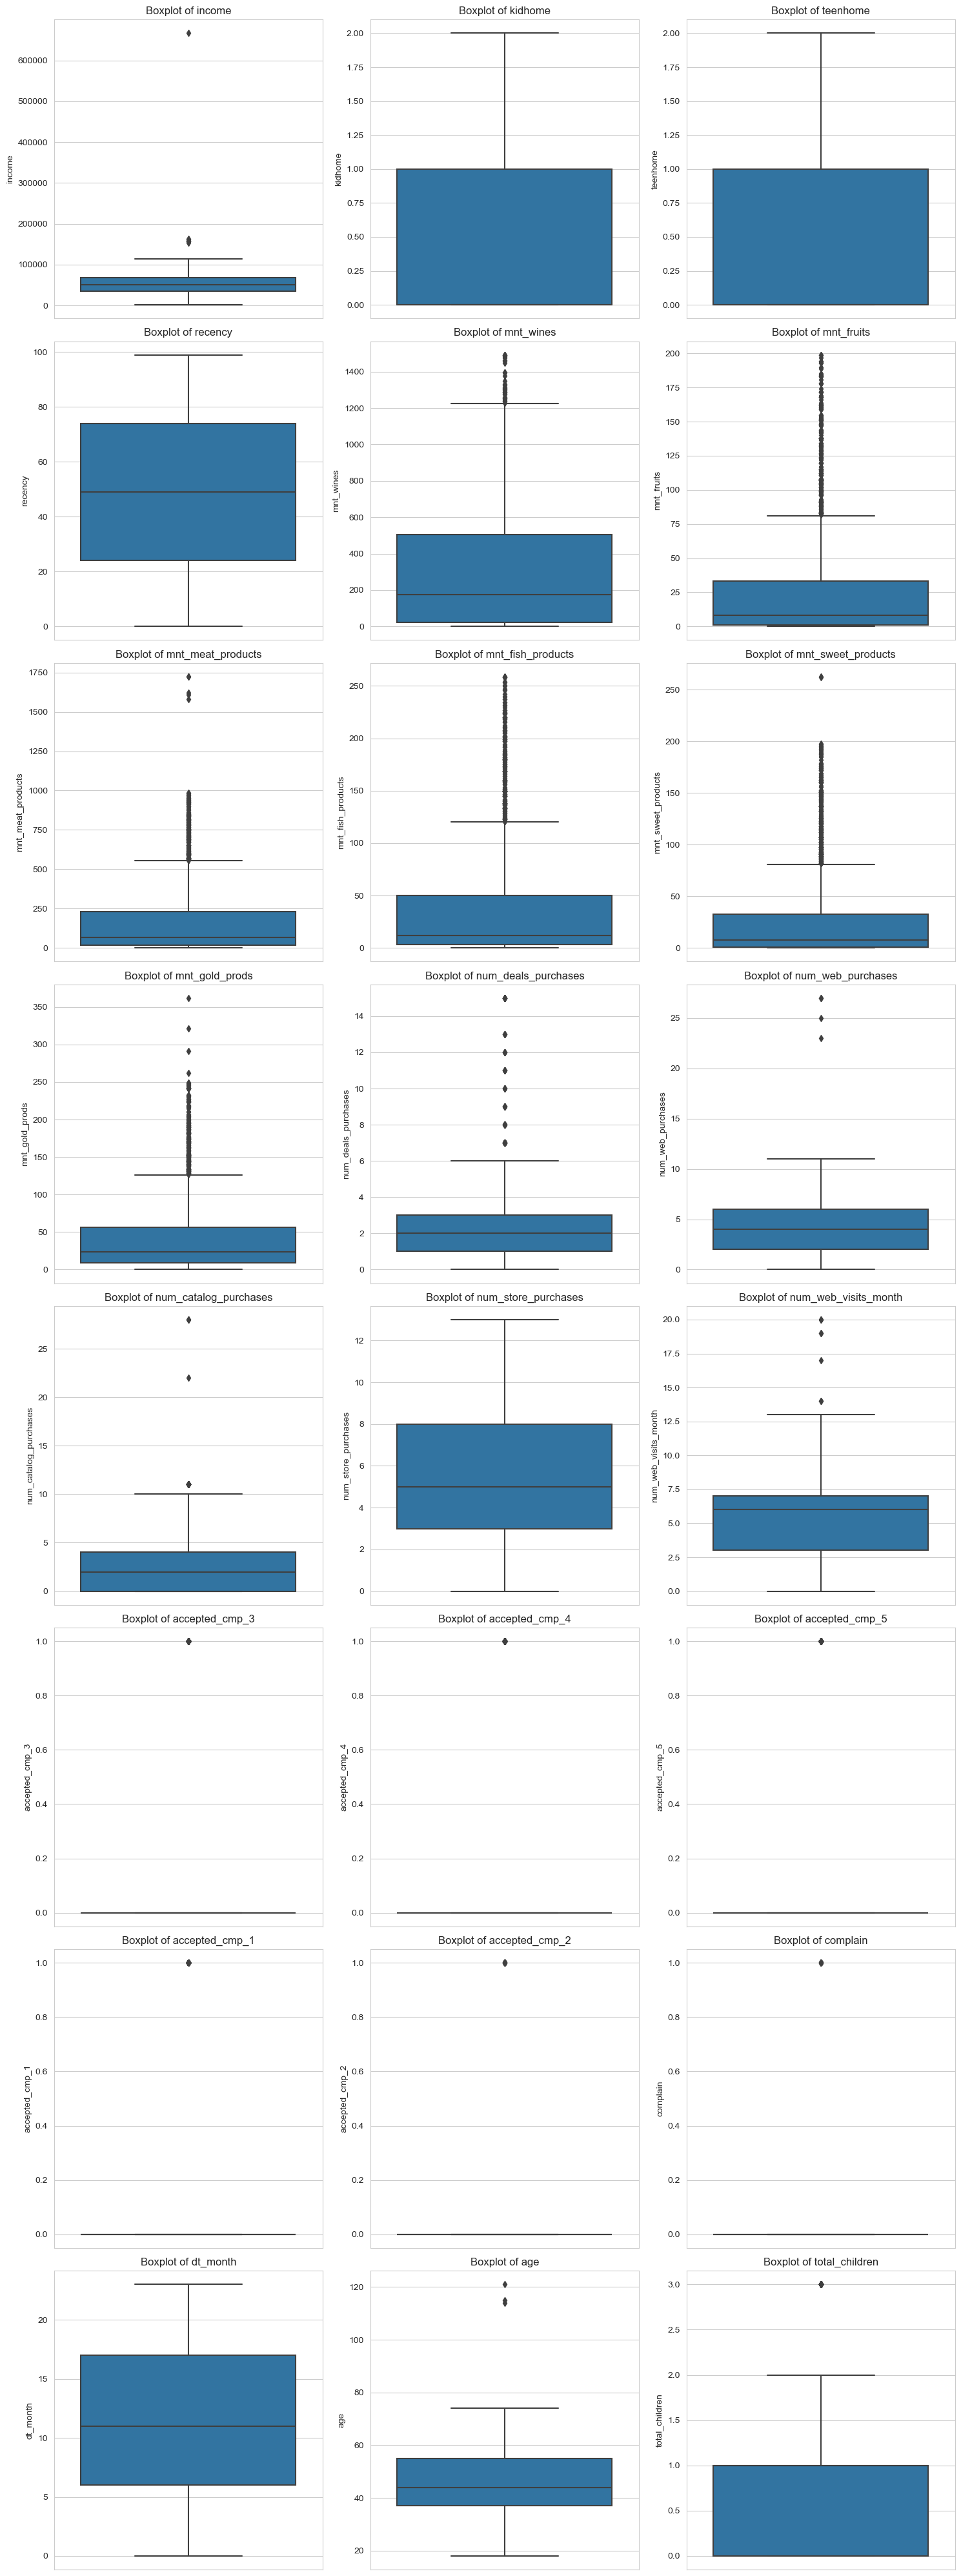

In [170]:
numeric_columns = df.select_dtypes(include=['number'])

ncols = 3
num_plots = len(numeric_columns.columns)
nrows = (num_plots - 1) // ncols + 1

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))

for i, column in enumerate(numeric_columns.columns):
    row = i // ncols
    col = i % ncols
    sns.boxplot(data=numeric_columns, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

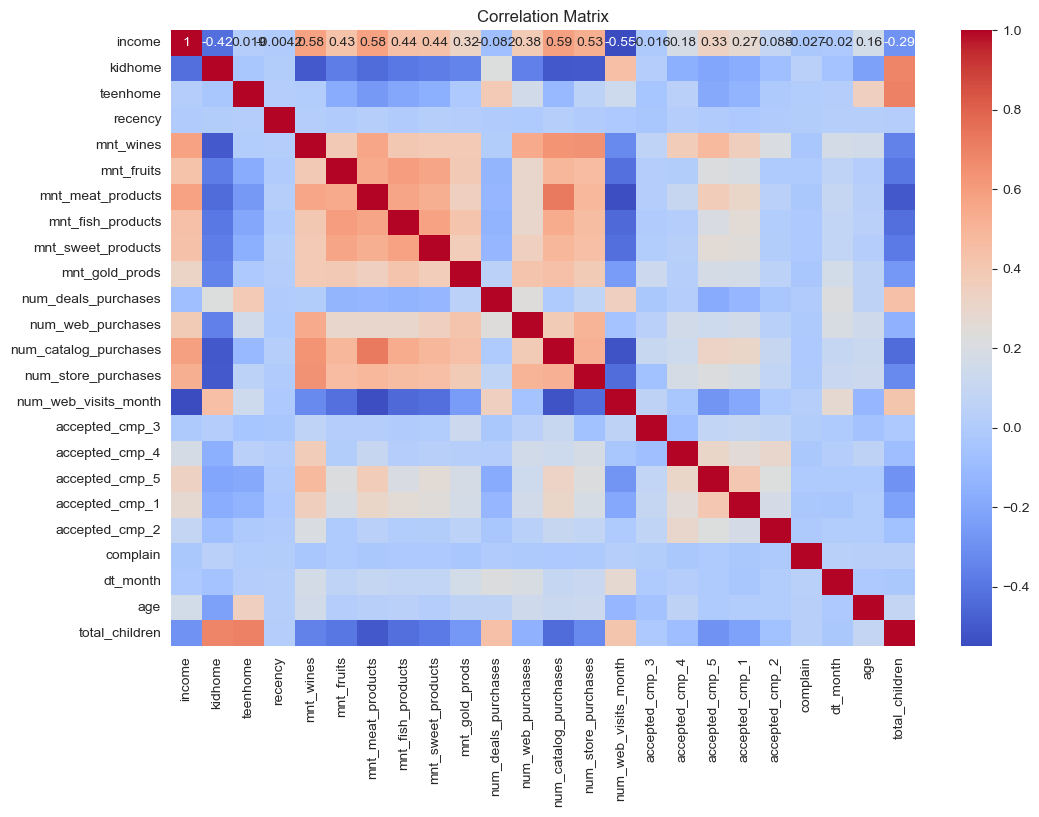

In [172]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.

# 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.

The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of purchases and Income
- **Spender Customers** --  Income is less but purcheses high, so can also be treated as potential target customer.

## K-means Clsutering

### Create a new dataset with numeric features

#### Determine optimal number of clusters

### inertia

In [39]:
def elbow_vis(X, k_range=range(2, 11), inertia=True):
    """
    This is a function that visualizes the elbow method for determining the optimal number of clusters in a dataset.

    Args:
        X (pd.Dataframe): Input data
        k_range (range, optional): generator for k values. Defaults to range(2, 11).
        inertia (bool, optional): to select either inertia or distorion. Defaults to True.
    Returns:
        None.
    """
    if inertia:
        inertias = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
            inertias.append(kmeanModel.inertia_)
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, inertias, "bo--")
        plt.xlabel("k")
        plt.ylabel("Inertia")
        plt.title("The Elbow Method showing the optimal k")
        plt.show()
    else:
        distortion = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42)
            kmeanModel.fit(X)
            distances = kmeanModel.transform(
                X
            )  # distances from each observation to each cluster centroid
            labels = kmeanModel.labels_
            result = []
            for i in range(k):
                cluster_distances = distances[
                    labels == i, i
                ]  # distances from observations in each cluster to their own centroid
                result.append(
                    np.mean(cluster_distances**2)
                )  # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
            distortion.append(
                sum(result)
            )  # sum the means of all clusters and add it to the distortion list

        plt.figure(figsize=(10, 6))
        plt.plot(k_range, distortion, "r*--", markersize=14.0)
        plt.xlabel("Different k values")
        plt.ylabel("Distortion")
        plt.title("elbow method")

### distortion

### silhoutte score

#### Apply K Means

#### Visualizing and Labeling All the Clusters

### Clustering based on selected features

#### Select features from existing data

#### Determine optimal number of clusters for selected features

#### Building the model based on the optimal number of clusters with selected features

#### We have made our inferences on the Kmeans algorithm so far, and we will take and compare the results with another clustering algorithm, Hierarchical Clustering:


### The point we need to pay attention to is the number of clusters in kmeans so that we can find the differences.

## Hierarchical Clustering

### Determine optimal number of clusters using Dendogram

### silhouette_score

### Clustering based on selected features

## Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___